In [4]:
import pandas as pd
import numpy as np
import re
import matplotlib as plt
ndf = pd.read_csv("OpenKontiLUQS_NO2_2010-2019.csv", sep =  ";", skiprows = 2)
%matplotlib inline 



In [5]:


ndf.columns = ndf.columns.str.replace(' NO2 1H Mittelwert', '')

In [6]:
ndf.columns

Index(['Datum', 'Zeit', 'AABU [�g/m�]', 'BIEL [�g/m�]', 'BONN [�g/m�]',
       'BORG [�g/m�]', 'BOTT [�g/m�]', 'CHOR [�g/m�]', 'DATT [�g/m�]',
       'DDCS [�g/m�]', 'DLOH [�g/m�]', 'DMD2 [�g/m�]', 'DUBR [�g/m�]',
       'DUB2 [�g/m�]', 'DURH [�g/m�]', 'DWER [�g/m�]', 'EIFE [�g/m�]',
       'ELAN [�g/m�]', 'ELSB [�g/m�]', 'EVOG [�g/m�]', 'GELS [�g/m�]',
       'GRGG [�g/m�]', 'HATT [�g/m�]', 'HUE2 [�g/m�]', 'INLA [�g/m�]',
       'JACK [�g/m�]', 'JHNK [�g/m�]', 'KRHA [�g/m�]', 'KRIN [�g/m�]',
       'LEV2 [�g/m�]', 'LOER [�g/m�]', 'MGRH [�g/m�]', 'MSGE [�g/m�]',
       'NERH [�g/m�]', 'NETT [�g/m�]', 'NIED [�g/m�]', 'RAT2 [�g/m�]',
       'REHK [�g/m�]', 'RODE [�g/m�]', 'ROTH [�g/m�]', 'SHW2 [�g/m�]',
       'SOES [�g/m�]', 'SOLI [�g/m�]', 'STYR [�g/m�]', 'UNNA [�g/m�]',
       'VACW [�g/m�]', 'VBID [�g/m�]', 'VBIH [�g/m�]', 'VBIS [�g/m�]',
       'VBOH [�g/m�]', 'VBOT [�g/m�]', 'VDIN [�g/m�]', 'VDNS [�g/m�]',
       'VDOM [�g/m�]', 'VDOR [�g/m�]', 'VDSR [�g/m�]', 'VDUI [�g/m�]',
     

In [7]:
ndf_col=['Datum',
'Zeit',
'AABU', 
'BIEL', 
'BONN', 
'BORG', 
'BOTT', 
'CHOR', 
'DATT', 
'DDCS', 
'DLOH', 
'DMD2', 
'DUBR', 
'DUB2', 
'DURH', 
'DWER', 
'EIFE', 
'ELAN', 
'ELSB', 
'EVOG', 
'GELS', 
'GRGG', 
'HATT', 
'HUE2', 
'INLA', 
'JACK', 
'JHNK', 
'KRHA', 
'KRIN', 
'LEV2', 
'LOER', 
'MGRH', 
'MSGE', 
'NERH', 
'NETT', 
'NIED', 
'RAT2', 
'REHK', 
'RODE', 
'ROTH', 
'SHW2', 
'SOES', 
'SOLI', 
'STYR', 
'UNNA', 
'VACW', 
'VBID', 
'VBIH', 
'VBIS', 
'VBOH', 
'VBOT', 
'VDIN', 
'VDNS', 
'VDOM', 
'VDOR', 
'VDSR', 
'VDUI', 
'VEAE', 
'VEFD', 
'VEME', 
'VESN', 
'VGES', 
'VGLG', 
'VHAM', 
'VHER', 
'VISE', 
'VKCL', 
'VKTU', 
'VLEG', 
'VLSL', 
'VMEB', 
'VMGF', 
'VMGR', 
'VMHA', 
'VMS2', 
'VOBM', 
'VREB', 
'VSCH', 
'VSGK', 
'VWEL', 
'WALS', 
'WAST', 
'WESE', 
'WULA' ]

In [8]:
ndf.columns = ndf_col

In [9]:
ndf.astype(str)

,Datum,Zeit,AABU,BIEL,BONN,BORG,BOTT,CHOR,DATT,DDCS,...,VMS2,VOBM,VREB,VSCH,VSGK,VWEL,WALS,WAST,WESE,WULA
0,01.01.2010,01:00,26,22,32,<10,27,28,18,53,...,16,nan,23,nan,nan,40,15,12,<10,nan
1,01.01.2010,02:00,22,16,nan,<10,14,22,<10,60,...,12,nan,23,nan,nan,31,<10,12,<10,nan
2,01.01.2010,03:00,17,13,30,<10,11,21,<10,47,...,12,nan,20,nan,nan,32,<10,11,<10,nan
3,01.01.2010,04:00,15,11,27,<10,<10,24,<10,29,...,<10,nan,20,nan,nan,24,<10,10,<10,nan
4,01.01.2010,05:00,18,10,24,<10,<10,18,<10,30,...,<10,nan,19,nan,nan,23,<10,<10,<10,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,31.12.2019,20:00,34,27,41,24,28,39,41,51,...,45,46,nan,nan,40,33,50,16,41,21
87644,31.12.2019,21:00,35,27,38,35,25,44,33,63,...,42,52,nan,nan,29,44,46,<10,43,35
87645,31.12.2019,22:00,34,24,34,15,32,43,32,55,...,44,35,nan,nan,24,55,45,<10,33,41
87646,31.12.2019,23:00,31,21,32,17,36,41,25,54,...,44,38,nan,nan,25,52,nan,<10,25,35


In [10]:
ndf.fillna(0 , inplace = True)

In [11]:
ndf

,Datum,Zeit,AABU,BIEL,BONN,BORG,BOTT,CHOR,DATT,DDCS,...,VMS2,VOBM,VREB,VSCH,VSGK,VWEL,WALS,WAST,WESE,WULA
0,01.01.2010,01:00,26,22,32,<10,27,28,18,53,...,16,0,23,0,0,40,15,12,<10,0
1,01.01.2010,02:00,22,16,0,<10,14,22,<10,60,...,12,0,23,0,0,31,<10,12,<10,0
2,01.01.2010,03:00,17,13,30,<10,11,21,<10,47,...,12,0,20,0,0,32,<10,11,<10,0
3,01.01.2010,04:00,15,11,27,<10,<10,24,<10,29,...,<10,0,20,0,0,24,<10,10,<10,0
4,01.01.2010,05:00,18,10,24,<10,<10,18,<10,30,...,<10,0,19,0,0,23,<10,<10,<10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,31.12.2019,20:00,34,27,41,24,28,39,41,51,...,45,46,0,0,40,33,50,16,41,21
87644,31.12.2019,21:00,35,27,38,35,25,44,33,63,...,42,52,0,0,29,44,46,<10,43,35
87645,31.12.2019,22:00,34,24,34,15,32,43,32,55,...,44,35,0,0,24,55,45,<10,33,41
87646,31.12.2019,23:00,31,21,32,17,36,41,25,54,...,44,38,0,0,25,52,0,<10,25,35


In [12]:
df3 = pd.read_csv('NO2_DF3.csv',sep = ";")

In [13]:
df3

,Column1,Datum,Zeit,Aachen,Bielefeld,Bonn,Borken,Bottrop,K�ln,Datteln,...,M�nster,Oberhausen,Recklinghausen,Schwerte,Solingen,Wuppertal,Duisburg_14,Warstein,Wesel,Wuppertal
0,0,1012010,01:00,26,22,32.0,10,27,28,18,...,16,0.0,23,0.0,0.0,40.0,15,12,10,0.0
1,1,1012010,02:00,22,16,0.0,10,14,22,10,...,12,0.0,23,0.0,0.0,31.0,10,12,10,0.0
2,2,1012010,03:00,17,13,30.0,10,11,21,10,...,12,0.0,20,0.0,0.0,32.0,10,11,10,0.0
3,3,1012010,04:00,15,11,27.0,10,10,24,10,...,10,0.0,20,0.0,0.0,24.0,10,10,10,0.0
4,4,1012010,05:00,18,10,24.0,10,10,18,10,...,10,0.0,19,0.0,0.0,23.0,10,10,10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,87643,31122019,20:00,34,27,41.0,24,28,39,41,...,45,46.0,0,0.0,40.0,33.0,50,16,41,21.0
87644,87644,31122019,21:00,35,27,38.0,35,25,44,33,...,42,52.0,0,0.0,29.0,44.0,46,10,43,35.0
87645,87645,31122019,22:00,34,24,34.0,15,32,43,32,...,44,35.0,0,0.0,24.0,55.0,45,10,33,41.0
87646,87646,31122019,23:00,31,21,32.0,17,36,41,25,...,44,38.0,0,0.0,25.0,52.0,0,10,25,35.0


In [14]:
df3.drop(['Column1'], axis = 1, inplace = True) 

In [15]:
df3

,Datum,Zeit,Aachen,Bielefeld,Bonn,Borken,Bottrop,K�ln,Datteln,D�sseldorf,...,M�nster,Oberhausen,Recklinghausen,Schwerte,Solingen,Wuppertal,Duisburg_14,Warstein,Wesel,Wuppertal
0,1012010,01:00,26,22,32.0,10,27,28,18,53.0,...,16,0.0,23,0.0,0.0,40.0,15,12,10,0.0
1,1012010,02:00,22,16,0.0,10,14,22,10,60.0,...,12,0.0,23,0.0,0.0,31.0,10,12,10,0.0
2,1012010,03:00,17,13,30.0,10,11,21,10,47.0,...,12,0.0,20,0.0,0.0,32.0,10,11,10,0.0
3,1012010,04:00,15,11,27.0,10,10,24,10,29.0,...,10,0.0,20,0.0,0.0,24.0,10,10,10,0.0
4,1012010,05:00,18,10,24.0,10,10,18,10,30.0,...,10,0.0,19,0.0,0.0,23.0,10,10,10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,31122019,20:00,34,27,41.0,24,28,39,41,51.0,...,45,46.0,0,0.0,40.0,33.0,50,16,41,21.0
87644,31122019,21:00,35,27,38.0,35,25,44,33,63.0,...,42,52.0,0,0.0,29.0,44.0,46,10,43,35.0
87645,31122019,22:00,34,24,34.0,15,32,43,32,55.0,...,44,35.0,0,0.0,24.0,55.0,45,10,33,41.0
87646,31122019,23:00,31,21,32.0,17,36,41,25,54.0,...,44,38.0,0,0.0,25.0,52.0,0,10,25,35.0


In [16]:
ndf_col=['Datum',
'Zeit',
'Aachen1',
'Bielefeld1',
'Bonn',
'Borken',
'Bottrop1',
'Cologne1',
'Datteln',
'Duesseldorf1',
'Duesseldorf2',
'Dortmund1',
'Duisburg1',
'Duisburg2',
'Duisburg3',
'Duesseldorf3',
'Simmerath',
'Essen1',
'Elsdorf',
'Essen2',
'Gelsenkirchen1',
'Grevenbroich',
'Hattingen',
'Huerth',
'Inden',
'Jackerath',
'Juchen',
'Krefeld1',
'Krefeld2',
'Leverkusen1',
'Duesseldorf4',
'Moenchengladbach1',
'Muenster1',
'Neuss',
'Nettetal',
'Lunen',
'Ratingen',
'Recklinghausen1',
'Cologne2',
'Netphen',
'Schwerte1',
'Soest',
'Solingen1',
'Muelheim1',
'Unna',
'Aachen2',
'Bielefeld2',
'Bielefeld3',
'Bielefeld4',
'Bochum',
'Bottrop2',
'Dinslaken',
'Duren',
'Dortmund2',
'Dortmund3',
'Duesseldorf5',
'Duisburg4',
'Essen3',
'Essen4',
'Emmerich',
'Essen5',
'Gelsenkirchen2',
'Gladbeck',
'Hagen',
'Herne',
'Iserlohn',
'Cologne3',
'Cologne4',
'Leverkusen2',
'Luedenscheid',
'Mettmann',
'Moenchengladbach2',
'Moenchengladbach3',
'Muelheim2',
'Muenster2',
'Oberhausen',
'Recklinghausen2',
'Schwerte2',
'Solingen2',
'Wuppertal1',
'Duisburg5',
'Warstein',
'Wesel',
'Wuppertal2']

In [17]:
ndf_col

['Datum',
 'Zeit',
 'Aachen1',
 'Bielefeld1',
 'Bonn',
 'Borken',
 'Bottrop1',
 'Cologne1',
 'Datteln',
 'Duesseldorf1',
 'Duesseldorf2',
 'Dortmund1',
 'Duisburg1',
 'Duisburg2',
 'Duisburg3',
 'Duesseldorf3',
 'Simmerath',
 'Essen1',
 'Elsdorf',
 'Essen2',
 'Gelsenkirchen1',
 'Grevenbroich',
 'Hattingen',
 'Huerth',
 'Inden',
 'Jackerath',
 'Juchen',
 'Krefeld1',
 'Krefeld2',
 'Leverkusen1',
 'Duesseldorf4',
 'Moenchengladbach1',
 'Muenster1',
 'Neuss',
 'Nettetal',
 'Lunen',
 'Ratingen',
 'Recklinghausen1',
 'Cologne2',
 'Netphen',
 'Schwerte1',
 'Soest',
 'Solingen1',
 'Muelheim1',
 'Unna',
 'Aachen2',
 'Bielefeld2',
 'Bielefeld3',
 'Bielefeld4',
 'Bochum',
 'Bottrop2',
 'Dinslaken',
 'Duren',
 'Dortmund2',
 'Dortmund3',
 'Duesseldorf5',
 'Duisburg4',
 'Essen3',
 'Essen4',
 'Emmerich',
 'Essen5',
 'Gelsenkirchen2',
 'Gladbeck',
 'Hagen',
 'Herne',
 'Iserlohn',
 'Cologne3',
 'Cologne4',
 'Leverkusen2',
 'Luedenscheid',
 'Mettmann',
 'Moenchengladbach2',
 'Moenchengladbach3',
 'Muelh

In [18]:
df3.columns = ndf_col

In [19]:
df3

,Datum,Zeit,Aachen1,Bielefeld1,Bonn,Borken,Bottrop1,Cologne1,Datteln,Duesseldorf1,...,Muenster2,Oberhausen,Recklinghausen2,Schwerte2,Solingen2,Wuppertal1,Duisburg5,Warstein,Wesel,Wuppertal2
0,1012010,01:00,26,22,32.0,10,27,28,18,53.0,...,16,0.0,23,0.0,0.0,40.0,15,12,10,0.0
1,1012010,02:00,22,16,0.0,10,14,22,10,60.0,...,12,0.0,23,0.0,0.0,31.0,10,12,10,0.0
2,1012010,03:00,17,13,30.0,10,11,21,10,47.0,...,12,0.0,20,0.0,0.0,32.0,10,11,10,0.0
3,1012010,04:00,15,11,27.0,10,10,24,10,29.0,...,10,0.0,20,0.0,0.0,24.0,10,10,10,0.0
4,1012010,05:00,18,10,24.0,10,10,18,10,30.0,...,10,0.0,19,0.0,0.0,23.0,10,10,10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,31122019,20:00,34,27,41.0,24,28,39,41,51.0,...,45,46.0,0,0.0,40.0,33.0,50,16,41,21.0
87644,31122019,21:00,35,27,38.0,35,25,44,33,63.0,...,42,52.0,0,0.0,29.0,44.0,46,10,43,35.0
87645,31122019,22:00,34,24,34.0,15,32,43,32,55.0,...,44,35.0,0,0.0,24.0,55.0,45,10,33,41.0
87646,31122019,23:00,31,21,32.0,17,36,41,25,54.0,...,44,38.0,0,0.0,25.0,52.0,0,10,25,35.0


In [20]:
df4 = pd.read_csv('NO2_data.csv',sep = ",")

In [21]:
df4.columns


Index(['Unnamed: 0', 'Datum', 'Zeit', 'AABU', 'BIEL', 'BONN', 'BORG', 'BOTT',
       'CHOR', 'DATT', 'DDCS', 'DLOH', 'DMD2', 'DUBR', 'DUB2', 'DURH', 'DWER',
       'EIFE', 'ELAN', 'ELSB', 'EVOG', 'GELS', 'GRGG', 'HATT', 'HUE2', 'INLA',
       'JACK', 'JHNK', 'KRHA', 'KRIN', 'LEV2', 'LOER', 'MGRH', 'MSGE', 'NERH',
       'NETT', 'NIED', 'RAT2', 'REHK', 'RODE', 'ROTH', 'SHW2', 'SOES', 'SOLI',
       'STYR', 'UNNA', 'VACW', 'VBID', 'VBIH', 'VBIS', 'VBOH', 'VBOT', 'VDIN',
       'VDNS', 'VDOM', 'VDOR', 'VDSR', 'VDUI', 'VEAE', 'VEFD', 'VEME', 'VESN',
       'VGES', 'VGLG', 'VHAM', 'VHER', 'VISE', 'VKCL', 'VKTU', 'VLEG', 'VLSL',
       'VMEB', 'VMGF', 'VMGR', 'VMHA', 'VMS2', 'VOBM', 'VREB', 'VSCH', 'VSGK',
       'VWEL', 'WALS', 'WAST', 'WESE', 'WULA'],
      dtype='object')

In [22]:
df4.drop(['Unnamed: 0'], axis = 1, inplace = True) 

In [23]:
df4

,Datum,Zeit,AABU,BIEL,BONN,BORG,BOTT,CHOR,DATT,DDCS,...,VMS2,VOBM,VREB,VSCH,VSGK,VWEL,WALS,WAST,WESE,WULA
0,01.01.2010,01:00,26,22,32,10,27,28,18,53,...,16,0,23,0,0,40,15,12,10,0
1,01.01.2010,02:00,22,16,0,10,14,22,10,60,...,12,0,23,0,0,31,10,12,10,0
2,01.01.2010,03:00,17,13,30,10,11,21,10,47,...,12,0,20,0,0,32,10,11,10,0
3,01.01.2010,04:00,15,11,27,10,10,24,10,29,...,10,0,20,0,0,24,10,10,10,0
4,01.01.2010,05:00,18,10,24,10,10,18,10,30,...,10,0,19,0,0,23,10,10,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,31.12.2019,20:00,34,27,41,24,28,39,41,51,...,45,46,0,0,40,33,50,16,41,21
87644,31.12.2019,21:00,35,27,38,35,25,44,33,63,...,42,52,0,0,29,44,46,10,43,35
87645,31.12.2019,22:00,34,24,34,15,32,43,32,55,...,44,35,0,0,24,55,45,10,33,41
87646,31.12.2019,23:00,31,21,32,17,36,41,25,54,...,44,38,0,0,25,52,0,10,25,35


In [24]:
df4.columns = ndf_col

In [25]:
df4

,Datum,Zeit,Aachen1,Bielefeld1,Bonn,Borken,Bottrop1,Cologne1,Datteln,Duesseldorf1,...,Muenster2,Oberhausen,Recklinghausen2,Schwerte2,Solingen2,Wuppertal1,Duisburg5,Warstein,Wesel,Wuppertal2
0,01.01.2010,01:00,26,22,32,10,27,28,18,53,...,16,0,23,0,0,40,15,12,10,0
1,01.01.2010,02:00,22,16,0,10,14,22,10,60,...,12,0,23,0,0,31,10,12,10,0
2,01.01.2010,03:00,17,13,30,10,11,21,10,47,...,12,0,20,0,0,32,10,11,10,0
3,01.01.2010,04:00,15,11,27,10,10,24,10,29,...,10,0,20,0,0,24,10,10,10,0
4,01.01.2010,05:00,18,10,24,10,10,18,10,30,...,10,0,19,0,0,23,10,10,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,31.12.2019,20:00,34,27,41,24,28,39,41,51,...,45,46,0,0,40,33,50,16,41,21
87644,31.12.2019,21:00,35,27,38,35,25,44,33,63,...,42,52,0,0,29,44,46,10,43,35
87645,31.12.2019,22:00,34,24,34,15,32,43,32,55,...,44,35,0,0,24,55,45,10,33,41
87646,31.12.2019,23:00,31,21,32,17,36,41,25,54,...,44,38,0,0,25,52,0,10,25,35


In [26]:
ndf_sorted_col=['Datum',
'Zeit',
'Aachen1',
'Aachen2',
'Bielefeld1',
'Bielefeld2',
'Bielefeld3',
'Bielefeld4',
'Bonn',
'Borken',
'Bottrop1',
'Bottrop2',
'Cologne1',
'Cologne2',
'Cologne3',
'Cologne4',
'Datteln',
'Duesseldorf1',
'Duesseldorf2',
'Duesseldorf3',
'Duesseldorf4',
'Duesseldorf5',
'Dortmund1',
'Dortmund2',
'Dortmund3',
'Duisburg1',
'Duisburg2',
'Duisburg3',
'Duisburg4',
'Duisburg5',
'Simmerath',
'Essen1',
'Essen2',
'Essen3',
'Essen4',
'Essen5',
'Elsdorf',
'Gelsenkirchen1',
'Gelsenkirchen2',
'Grevenbroich',
'Hattingen',
'Huerth',
'Inden',
'Jackerath',
'Juchen',
'Krefeld1',
'Krefeld2',
'Leverkusen1',
'Leverkusen2',
'Moenchengladbach1',
'Moenchengladbach2',
'Moenchengladbach3',
'Muenster1',
'Muenster2',
'Muelheim1',
'Muelheim2',
'Neuss',
'Nettetal',
'Lunen',
'Ratingen',
'Recklinghausen1',
'Recklinghausen2',
'Netphen',
'Schwerte1',
'Schwerte2',
'Soest',
'Solingen1',
'Solingen2',
'Unna',
'Bochum',
'Dinslaken',
'Duren',
'Emmerich',
'Gladbeck',
'Hagen',
'Herne',
'Iserlohn',
'Luedenscheid',
'Mettmann',
'Oberhausen',
'Wuppertal1',
'Wuppertal2',
'Warstein',
'Wesel']

In [27]:
df5 = df4[ndf_sorted_col]

In [28]:
df5

,Datum,Zeit,Aachen1,Aachen2,Bielefeld1,Bielefeld2,Bielefeld3,Bielefeld4,Bonn,Borken,...,Hagen,Herne,Iserlohn,Luedenscheid,Mettmann,Oberhausen,Wuppertal1,Wuppertal2,Warstein,Wesel
0,01.01.2010,01:00,26,45,22,0,0,28,32,10,...,0,0,32,0,0.0,0,40,0,12,10
1,01.01.2010,02:00,22,49,16,0,0,0,0,10,...,0,0,26,0,0.0,0,31,0,12,10
2,01.01.2010,03:00,17,40,13,0,0,12,30,10,...,0,0,22,0,0.0,0,32,0,11,10
3,01.01.2010,04:00,15,35,11,0,0,10,27,10,...,0,0,18,0,0.0,0,24,0,10,10
4,01.01.2010,05:00,18,32,10,0,0,10,24,10,...,0,0,19,0,0.0,0,23,0,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,31.12.2019,20:00,34,39,27,25,36,0,41,24,...,67,0,0,0,0.0,46,33,21,16,41
87644,31.12.2019,21:00,35,40,27,25,35,0,38,35,...,67,0,0,0,0.0,52,44,35,10,43
87645,31.12.2019,22:00,34,41,24,27,31,0,34,15,...,66,0,0,0,0.0,35,55,41,10,33
87646,31.12.2019,23:00,31,41,21,0,33,0,32,17,...,51,0,0,0,0.0,38,52,35,10,25


In [29]:
df5.columns

Index(['Datum', 'Zeit', 'Aachen1', 'Aachen2', 'Bielefeld1', 'Bielefeld2',
       'Bielefeld3', 'Bielefeld4', 'Bonn', 'Borken', 'Bottrop1', 'Bottrop2',
       'Cologne1', 'Cologne2', 'Cologne3', 'Cologne4', 'Datteln',
       'Duesseldorf1', 'Duesseldorf2', 'Duesseldorf3', 'Duesseldorf4',
       'Duesseldorf5', 'Dortmund1', 'Dortmund2', 'Dortmund3', 'Duisburg1',
       'Duisburg2', 'Duisburg3', 'Duisburg4', 'Duisburg5', 'Simmerath',
       'Essen1', 'Essen2', 'Essen3', 'Essen4', 'Essen5', 'Elsdorf',
       'Gelsenkirchen1', 'Gelsenkirchen2', 'Grevenbroich', 'Hattingen',
       'Huerth', 'Inden', 'Jackerath', 'Juchen', 'Krefeld1', 'Krefeld2',
       'Leverkusen1', 'Leverkusen2', 'Moenchengladbach1', 'Moenchengladbach2',
       'Moenchengladbach3', 'Muenster1', 'Muenster2', 'Muelheim1', 'Muelheim2',
       'Neuss', 'Nettetal', 'Lunen', 'Ratingen', 'Recklinghausen1',
       'Recklinghausen2', 'Netphen', 'Schwerte1', 'Schwerte2', 'Soest',
       'Solingen1', 'Solingen2', 'Unna', 'Bochum', 'D

In [30]:
df5['Aachen'] = df5.loc[: , "Aachen1": "Aachen2"].mean(axis = 1)
df5['Bielefeld'] = df5.loc[: , "Bielefeld1":"Bielefeld4"].mean(axis = 1)
df5['Bottrop'] = df5.loc[:,"Bottrop1":"Bottrop2"].mean(axis = 1)
df5['Cologne'] = df5.loc[: , "Cologne1":"Cologne4"].mean(axis = 1)
df5['Duesseldorf'] = df5.loc[: , "Duesseldorf1":"Duesseldorf5"].mean(axis = 1)
df5['Dortmund'] = df5.loc[: , "Dortmund1":"Dortmund3"].mean(axis = 1)
df5['Duisburg'] = df5.loc[: , "Duisburg1":"Duisburg5"].mean(axis = 1)
df5['Essen'] = df5.loc[: , "Essen1":"Essen5"].mean(axis = 1)
df5['Gelsenkirchen'] = df5.loc[: , "Gelsenkirchen1":"Gelsenkirchen2"].mean(axis = 1)
df5['Krefeld'] = df5.loc[: , "Krefeld1":"Krefeld2"].mean(axis = 1)
df5['Leverkusen'] = df5.loc[: , "Leverkusen1":"Leverkusen2"].mean(axis = 1)
df5['Moenchengladbach'] = df5.loc[: , "Moenchengladbach1":"Moenchengladbach3"].mean(axis = 1)
df5['Muenster'] = df5.loc[: , "Muenster1":"Muenster2"].mean(axis = 1)
df5['Muelheim'] = df5.loc[: , "Muelheim1":"Muelheim2"].mean(axis = 1)
df5['Recklinghausen'] = df5.loc[: , "Recklinghausen1":"Recklinghausen2"].mean(axis = 1)
df5['Schwerte'] = df5.loc[: , "Schwerte1":"Schwerte2"].mean(axis = 1)
df5['Solingen'] = df5.loc[: , "Solingen1":"Solingen2"].mean(axis = 1)
df5['Wuppertal'] = df5.loc[: , "Wuppertal1":"Wuppertal2"].mean(axis = 1)








<ipython-input-30-964af6433350>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Aachen'] = df5.loc[: , "Aachen1": "Aachen2"].mean(axis = 1)
<ipython-input-30-964af6433350>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Bielefeld'] = df5.loc[: , "Bielefeld1":"Bielefeld4"].mean(axis = 1)
<ipython-input-30-964af6433350>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [31]:
df5

,Datum,Zeit,Aachen1,Aachen2,Bielefeld1,Bielefeld2,Bielefeld3,Bielefeld4,Bonn,Borken,...,Gelsenkirchen,Krefeld,Leverkusen,Moenchengladbach,Muenster,Muelheim,Recklinghausen,Schwerte,Solingen,Wuppertal
0,01.01.2010,01:00,26,45,22,0,0,28,32,10,...,10.5,20.5,17.0,25.666667,18.5,11.5,11.5,6.0,0.0,20.0
1,01.01.2010,02:00,22,49,16,0,0,0,0,10,...,5.5,19.5,14.5,20.000000,11.0,7.5,11.5,7.0,0.0,15.5
2,01.01.2010,03:00,17,40,13,0,0,12,30,10,...,5.0,13.5,13.0,18.666667,11.0,5.0,10.0,7.5,0.0,16.0
3,01.01.2010,04:00,15,35,11,0,0,10,27,10,...,5.0,7.5,13.0,16.000000,10.0,5.0,10.0,6.0,0.0,12.0
4,01.01.2010,05:00,18,32,10,0,0,10,24,10,...,5.0,13.0,10.0,8.000000,10.0,6.0,9.5,6.5,0.0,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,31.12.2019,20:00,34,39,27,25,36,0,41,24,...,43.0,7.0,43.5,26.000000,39.0,14.5,0.0,9.5,32.5,27.0
87644,31.12.2019,21:00,35,40,27,25,35,0,38,35,...,32.5,7.5,39.0,28.666667,36.0,18.0,0.0,12.5,27.0,39.5
87645,31.12.2019,22:00,34,41,24,27,31,0,34,15,...,42.5,9.5,36.0,32.000000,39.5,18.0,0.0,13.0,21.5,48.0
87646,31.12.2019,23:00,31,41,21,0,33,0,32,17,...,44.0,15.5,35.0,28.333333,40.5,0.0,0.0,15.5,22.0,43.5


In [32]:
Df6 = df5

In [33]:
Df6

,Datum,Zeit,Aachen1,Aachen2,Bielefeld1,Bielefeld2,Bielefeld3,Bielefeld4,Bonn,Borken,...,Gelsenkirchen,Krefeld,Leverkusen,Moenchengladbach,Muenster,Muelheim,Recklinghausen,Schwerte,Solingen,Wuppertal
0,01.01.2010,01:00,26,45,22,0,0,28,32,10,...,10.5,20.5,17.0,25.666667,18.5,11.5,11.5,6.0,0.0,20.0
1,01.01.2010,02:00,22,49,16,0,0,0,0,10,...,5.5,19.5,14.5,20.000000,11.0,7.5,11.5,7.0,0.0,15.5
2,01.01.2010,03:00,17,40,13,0,0,12,30,10,...,5.0,13.5,13.0,18.666667,11.0,5.0,10.0,7.5,0.0,16.0
3,01.01.2010,04:00,15,35,11,0,0,10,27,10,...,5.0,7.5,13.0,16.000000,10.0,5.0,10.0,6.0,0.0,12.0
4,01.01.2010,05:00,18,32,10,0,0,10,24,10,...,5.0,13.0,10.0,8.000000,10.0,6.0,9.5,6.5,0.0,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,31.12.2019,20:00,34,39,27,25,36,0,41,24,...,43.0,7.0,43.5,26.000000,39.0,14.5,0.0,9.5,32.5,27.0
87644,31.12.2019,21:00,35,40,27,25,35,0,38,35,...,32.5,7.5,39.0,28.666667,36.0,18.0,0.0,12.5,27.0,39.5
87645,31.12.2019,22:00,34,41,24,27,31,0,34,15,...,42.5,9.5,36.0,32.000000,39.5,18.0,0.0,13.0,21.5,48.0
87646,31.12.2019,23:00,31,41,21,0,33,0,32,17,...,44.0,15.5,35.0,28.333333,40.5,0.0,0.0,15.5,22.0,43.5


In [34]:
Df6.drop(['Aachen1', 'Aachen2', 'Bielefeld1', 'Bielefeld2',
       'Bielefeld3', 'Bielefeld4','Bottrop1', 'Bottrop2',
       'Cologne1', 'Cologne2', 'Cologne3', 'Cologne4',
       'Duesseldorf1', 'Duesseldorf2', 'Duesseldorf3', 'Duesseldorf4',
       'Duesseldorf5', 'Dortmund1', 'Dortmund2', 'Dortmund3', 'Duisburg1',
       'Duisburg2', 'Duisburg3', 'Duisburg4', 'Duisburg5',
       'Essen1', 'Essen2', 'Essen3', 'Essen4', 'Essen5',
       'Gelsenkirchen1', 'Gelsenkirchen2','Krefeld1', 'Krefeld2',
       'Leverkusen1', 'Leverkusen2', 'Moenchengladbach1', 'Moenchengladbach2',
       'Moenchengladbach3', 'Muenster1', 'Muenster2', 'Muelheim1', 'Muelheim2','Recklinghausen1',
       'Recklinghausen2','Schwerte1', 'Schwerte2',
       'Solingen1', 'Solingen2', 'Wuppertal1', 'Wuppertal2'], axis = 1, inplace = True) 

C:\Users\anuph\anaconda3\envs\geo\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [35]:
Df6

,Datum,Zeit,Bonn,Borken,Datteln,Simmerath,Elsdorf,Grevenbroich,Hattingen,Huerth,...,Gelsenkirchen,Krefeld,Leverkusen,Moenchengladbach,Muenster,Muelheim,Recklinghausen,Schwerte,Solingen,Wuppertal
0,01.01.2010,01:00,32,10,18,18,0,21,0,30,...,10.5,20.5,17.0,25.666667,18.5,11.5,11.5,6.0,0.0,20.0
1,01.01.2010,02:00,0,10,10,17,0,20,0,23,...,5.5,19.5,14.5,20.000000,11.0,7.5,11.5,7.0,0.0,15.5
2,01.01.2010,03:00,30,10,10,16,0,24,0,25,...,5.0,13.5,13.0,18.666667,11.0,5.0,10.0,7.5,0.0,16.0
3,01.01.2010,04:00,27,10,10,15,0,19,0,28,...,5.0,7.5,13.0,16.000000,10.0,5.0,10.0,6.0,0.0,12.0
4,01.01.2010,05:00,24,10,10,17,0,14,0,26,...,5.0,13.0,10.0,8.000000,10.0,6.0,9.5,6.5,0.0,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,31.12.2019,20:00,41,24,41,16,46,0,10,42,...,43.0,7.0,43.5,26.000000,39.0,14.5,0.0,9.5,32.5,27.0
87644,31.12.2019,21:00,38,35,33,10,46,0,13,39,...,32.5,7.5,39.0,28.666667,36.0,18.0,0.0,12.5,27.0,39.5
87645,31.12.2019,22:00,34,15,32,10,42,0,18,37,...,42.5,9.5,36.0,32.000000,39.5,18.0,0.0,13.0,21.5,48.0
87646,31.12.2019,23:00,32,17,25,10,39,0,19,34,...,44.0,15.5,35.0,28.333333,40.5,0.0,0.0,15.5,22.0,43.5


In [36]:
Df6.columns

Index(['Datum', 'Zeit', 'Bonn', 'Borken', 'Datteln', 'Simmerath', 'Elsdorf',
       'Grevenbroich', 'Hattingen', 'Huerth', 'Inden', 'Jackerath', 'Juchen',
       'Neuss', 'Nettetal', 'Lunen', 'Ratingen', 'Netphen', 'Soest', 'Unna',
       'Bochum', 'Dinslaken', 'Duren', 'Emmerich', 'Gladbeck', 'Hagen',
       'Herne', 'Iserlohn', 'Luedenscheid', 'Mettmann', 'Oberhausen',
       'Warstein', 'Wesel', 'Aachen', 'Bielefeld', 'Bottrop', 'Cologne',
       'Duesseldorf', 'Dortmund', 'Duisburg', 'Essen', 'Gelsenkirchen',
       'Krefeld', 'Leverkusen', 'Moenchengladbach', 'Muenster', 'Muelheim',
       'Recklinghausen', 'Schwerte', 'Solingen', 'Wuppertal'],
      dtype='object')

In [37]:
Df6.drop(['Zeit', 'Borken', 'Datteln', 'Simmerath', 'Elsdorf',
       'Grevenbroich', 'Hattingen', 'Huerth', 'Inden', 'Jackerath', 'Juchen',
       'Neuss', 'Nettetal', 'Lunen', 'Ratingen', 'Netphen', 'Soest', 'Unna', 'Dinslaken', 'Duren', 'Emmerich', 'Gladbeck', 'Hagen',
       'Herne', 'Iserlohn', 'Luedenscheid', 'Mettmann', 'Oberhausen',
       'Warstein' ], axis = 1, inplace = True)

C:\Users\anuph\anaconda3\envs\geo\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [38]:
Df6.columns

Index(['Datum', 'Bonn', 'Bochum', 'Wesel', 'Aachen', 'Bielefeld', 'Bottrop',
       'Cologne', 'Duesseldorf', 'Dortmund', 'Duisburg', 'Essen',
       'Gelsenkirchen', 'Krefeld', 'Leverkusen', 'Moenchengladbach',
       'Muenster', 'Muelheim', 'Recklinghausen', 'Schwerte', 'Solingen',
       'Wuppertal'],
      dtype='object')

In [39]:
Df6['Datum']

0        01.01.2010
1        01.01.2010
2        01.01.2010
3        01.01.2010
4        01.01.2010
            ...    
87643    31.12.2019
87644    31.12.2019
87645    31.12.2019
87646    31.12.2019
87647    31.12.2019
Name: Datum, Length: 87648, dtype: object

In [40]:
Df6['Datum'] = pd.to_datetime(Df6.Datum)

<ipython-input-40-634c7132820c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df6['Datum'] = pd.to_datetime(Df6.Datum)


In [41]:
Df6.dtypes

Datum               datetime64[ns]
Bonn                         int64
Bochum                       int64
Wesel                        int64
Aachen                     float64
Bielefeld                  float64
Bottrop                    float64
Cologne                    float64
Duesseldorf                float64
Dortmund                   float64
Duisburg                   float64
Essen                      float64
Gelsenkirchen              float64
Krefeld                    float64
Leverkusen                 float64
Moenchengladbach           float64
Muenster                   float64
Muelheim                   float64
Recklinghausen             float64
Schwerte                   float64
Solingen                   float64
Wuppertal                  float64
dtype: object

In [42]:
Df6['Year'] = Df6.Datum.dt.year

<ipython-input-42-34f394d30b55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df6['Year'] = Df6.Datum.dt.year


In [43]:
Df6

,Datum,Bonn,Bochum,Wesel,Aachen,Bielefeld,Bottrop,Cologne,Duesseldorf,Dortmund,...,Krefeld,Leverkusen,Moenchengladbach,Muenster,Muelheim,Recklinghausen,Schwerte,Solingen,Wuppertal,Year
0,2010-01-01,32,0,10,35.5,12.50,13.5,42.25,10.6,40.000000,...,20.5,17.0,25.666667,18.5,11.5,11.5,6.0,0.0,20.0,2010
1,2010-01-01,0,0,10,35.5,4.00,7.0,39.75,16.0,29.000000,...,19.5,14.5,20.000000,11.0,7.5,11.5,7.0,0.0,15.5,2010
2,2010-01-01,30,0,10,28.5,6.25,5.5,41.50,12.2,22.333333,...,13.5,13.0,18.666667,11.0,5.0,10.0,7.5,0.0,16.0,2010
3,2010-01-01,27,0,10,25.0,5.25,5.0,27.50,7.8,23.333333,...,7.5,13.0,16.000000,10.0,5.0,10.0,6.0,0.0,12.0,2010
4,2010-01-01,24,0,10,25.0,5.00,5.0,37.75,8.0,20.666667,...,13.0,10.0,8.000000,10.0,6.0,9.5,6.5,0.0,11.5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,2019-12-31,41,0,41,36.5,22.00,14.0,48.25,26.0,22.333333,...,7.0,43.5,26.000000,39.0,14.5,0.0,9.5,32.5,27.0,2019
87644,2019-12-31,38,0,43,37.5,21.75,12.5,46.00,32.0,35.000000,...,7.5,39.0,28.666667,36.0,18.0,0.0,12.5,27.0,39.5,2019
87645,2019-12-31,34,0,33,37.5,20.50,16.0,42.00,28.6,21.000000,...,9.5,36.0,32.000000,39.5,18.0,0.0,13.0,21.5,48.0,2019
87646,2019-12-31,32,0,25,36.0,13.50,18.0,36.25,27.0,28.666667,...,15.5,35.0,28.333333,40.5,0.0,0.0,15.5,22.0,43.5,2019


In [44]:
Df6.Datum

0       2010-01-01
1       2010-01-01
2       2010-01-01
3       2010-01-01
4       2010-01-01
           ...    
87643   2019-12-31
87644   2019-12-31
87645   2019-12-31
87646   2019-12-31
87647   2019-12-31
Name: Datum, Length: 87648, dtype: datetime64[ns]

In [45]:
Df6.drop(['Datum'],axis = 1, inplace = True)

C:\Users\anuph\anaconda3\envs\geo\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [46]:
Df6

,Bonn,Bochum,Wesel,Aachen,Bielefeld,Bottrop,Cologne,Duesseldorf,Dortmund,Duisburg,...,Krefeld,Leverkusen,Moenchengladbach,Muenster,Muelheim,Recklinghausen,Schwerte,Solingen,Wuppertal,Year
0,32,0,10,35.5,12.50,13.5,42.25,10.6,40.000000,16.2,...,20.5,17.0,25.666667,18.5,11.5,11.5,6.0,0.0,20.0,2010
1,0,0,10,35.5,4.00,7.0,39.75,16.0,29.000000,12.2,...,19.5,14.5,20.000000,11.0,7.5,11.5,7.0,0.0,15.5,2010
2,30,0,10,28.5,6.25,5.5,41.50,12.2,22.333333,11.0,...,13.5,13.0,18.666667,11.0,5.0,10.0,7.5,0.0,16.0,2010
3,27,0,10,25.0,5.25,5.0,27.50,7.8,23.333333,9.4,...,7.5,13.0,16.000000,10.0,5.0,10.0,6.0,0.0,12.0,2010
4,24,0,10,25.0,5.00,5.0,37.75,8.0,20.666667,7.2,...,13.0,10.0,8.000000,10.0,6.0,9.5,6.5,0.0,11.5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,41,0,41,36.5,22.00,14.0,48.25,26.0,22.333333,39.4,...,7.0,43.5,26.000000,39.0,14.5,0.0,9.5,32.5,27.0,2019
87644,38,0,43,37.5,21.75,12.5,46.00,32.0,35.000000,42.0,...,7.5,39.0,28.666667,36.0,18.0,0.0,12.5,27.0,39.5,2019
87645,34,0,33,37.5,20.50,16.0,42.00,28.6,21.000000,36.8,...,9.5,36.0,32.000000,39.5,18.0,0.0,13.0,21.5,48.0,2019
87646,32,0,25,36.0,13.50,18.0,36.25,27.0,28.666667,24.6,...,15.5,35.0,28.333333,40.5,0.0,0.0,15.5,22.0,43.5,2019


<AxesSubplot:>

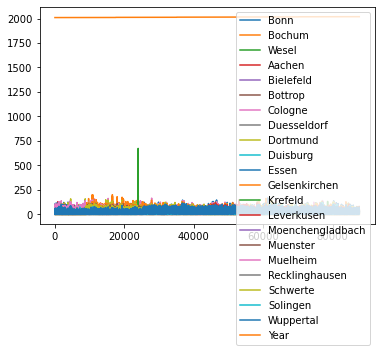

In [47]:
Df6.plot()

In [48]:
Df6[Df6.Year == 2010 ].mean()
Df6[Df6.Year == 2011 ].mean()

Bonn                  25.021233
Bochum                43.829795
Wesel                 23.388128
Aachen                32.123516
Bielefeld             15.338042
Bottrop               33.595890
Cologne               42.340068
Duesseldorf           17.636963
Dortmund              42.327816
Duisburg              18.959566
Essen                 30.194384
Gelsenkirchen         39.305080
Krefeld               16.259932
Leverkusen            14.137671
Moenchengladbach      21.554566
Muenster              29.960674
Muelheim              15.493208
Recklinghausen         0.359646
Schwerte              34.068094
Solingen              11.843379
Wuppertal             25.900514
Year                2011.000000
dtype: float64

In [49]:
Df6

,Bonn,Bochum,Wesel,Aachen,Bielefeld,Bottrop,Cologne,Duesseldorf,Dortmund,Duisburg,...,Krefeld,Leverkusen,Moenchengladbach,Muenster,Muelheim,Recklinghausen,Schwerte,Solingen,Wuppertal,Year
0,32,0,10,35.5,12.50,13.5,42.25,10.6,40.000000,16.2,...,20.5,17.0,25.666667,18.5,11.5,11.5,6.0,0.0,20.0,2010
1,0,0,10,35.5,4.00,7.0,39.75,16.0,29.000000,12.2,...,19.5,14.5,20.000000,11.0,7.5,11.5,7.0,0.0,15.5,2010
2,30,0,10,28.5,6.25,5.5,41.50,12.2,22.333333,11.0,...,13.5,13.0,18.666667,11.0,5.0,10.0,7.5,0.0,16.0,2010
3,27,0,10,25.0,5.25,5.0,27.50,7.8,23.333333,9.4,...,7.5,13.0,16.000000,10.0,5.0,10.0,6.0,0.0,12.0,2010
4,24,0,10,25.0,5.00,5.0,37.75,8.0,20.666667,7.2,...,13.0,10.0,8.000000,10.0,6.0,9.5,6.5,0.0,11.5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,41,0,41,36.5,22.00,14.0,48.25,26.0,22.333333,39.4,...,7.0,43.5,26.000000,39.0,14.5,0.0,9.5,32.5,27.0,2019
87644,38,0,43,37.5,21.75,12.5,46.00,32.0,35.000000,42.0,...,7.5,39.0,28.666667,36.0,18.0,0.0,12.5,27.0,39.5,2019
87645,34,0,33,37.5,20.50,16.0,42.00,28.6,21.000000,36.8,...,9.5,36.0,32.000000,39.5,18.0,0.0,13.0,21.5,48.0,2019
87646,32,0,25,36.0,13.50,18.0,36.25,27.0,28.666667,24.6,...,15.5,35.0,28.333333,40.5,0.0,0.0,15.5,22.0,43.5,2019


In [50]:
Y1 = Df6.Year


# Defining custom 'xlim' and 'ylim' values.
custom_ylim = (0, 500)

fig, axes1 = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

axes1[0].plot('Bonn',Y1)
axes1[0].set_title('NO2 status in Bonn')
axes1[0].set_ylabel('Cumulative Precipitation (mm)')

AttributeError: module 'matplotlib' has no attribute 'subplots'

In [51]:
Df6.to_csv('No2_beta.csv')

In [52]:
df7 = Df6.groupby('Year').mean()

In [53]:
df7

,Bonn,Bochum,Wesel,Aachen,Bielefeld,Bottrop,Cologne,Duesseldorf,Dortmund,Duisburg,...,Gelsenkirchen,Krefeld,Leverkusen,Moenchengladbach,Muenster,Muelheim,Recklinghausen,Schwerte,Solingen,Wuppertal
Year,,,,,,,,,,,,,,,,,,,,,
2010,28.753082,0.000000,22.796347,34.985902,15.727369,13.546404,41.773373,18.506553,44.474087,19.935799,...,13.696918,15.941153,16.341895,8.775723,33.578596,38.975057,22.176084,12.779110,12.499372,27.020148
2011,25.021233,43.829795,23.388128,32.123516,15.338042,33.595890,42.340068,17.636963,42.327816,18.959566,...,39.305080,16.259932,14.137671,21.554566,29.960674,15.493208,0.359646,34.068094,11.843379,25.900514
2012,24.674066,47.404372,22.237705,33.359290,14.931950,32.303222,41.267503,17.389413,39.639268,18.728620,...,37.434654,15.987420,13.999431,20.935413,32.013490,14.094376,0.000000,33.738445,12.050717,27.155908
2013,24.697945,0.554680,20.756849,32.128368,14.351826,30.757420,39.983305,23.069452,38.955175,20.544703,...,39.127340,15.171632,13.384075,20.151484,29.040183,14.043265,0.000000,32.734874,11.659304,37.446119
2014,27.067009,0.000000,22.011416,30.863813,14.704852,31.055479,40.068636,22.812808,38.366781,21.182169,...,38.005708,14.776884,13.339098,18.942390,29.249201,13.015811,0.000000,32.414840,10.924658,36.116324
2015,29.014041,0.000000,19.941895,31.819349,12.883990,13.054053,40.691381,23.387466,36.318912,18.510571,...,36.883447,13.422089,36.062443,17.544521,28.724486,12.575799,0.000000,11.215240,10.910616,36.531792
2016,28.034950,0.000000,21.560451,31.385644,13.828381,12.645435,39.031905,16.048110,37.846236,18.988297,...,35.982639,14.651981,35.363160,17.984821,28.458504,13.137921,0.000000,11.220401,10.634164,35.579975
2017,25.441667,0.000000,21.936986,29.428539,13.314583,12.208790,38.080708,15.489292,37.030023,19.626484,...,34.842295,14.285959,34.914269,17.320586,28.118550,12.438984,11.651199,11.250856,30.223973,35.508676
2018,26.661301,0.000000,20.665982,27.375228,22.905508,11.475685,37.089983,14.858014,35.807686,23.468995,...,34.199201,14.356849,32.968037,22.305137,26.144692,11.666838,0.015297,10.335674,26.709247,32.238984


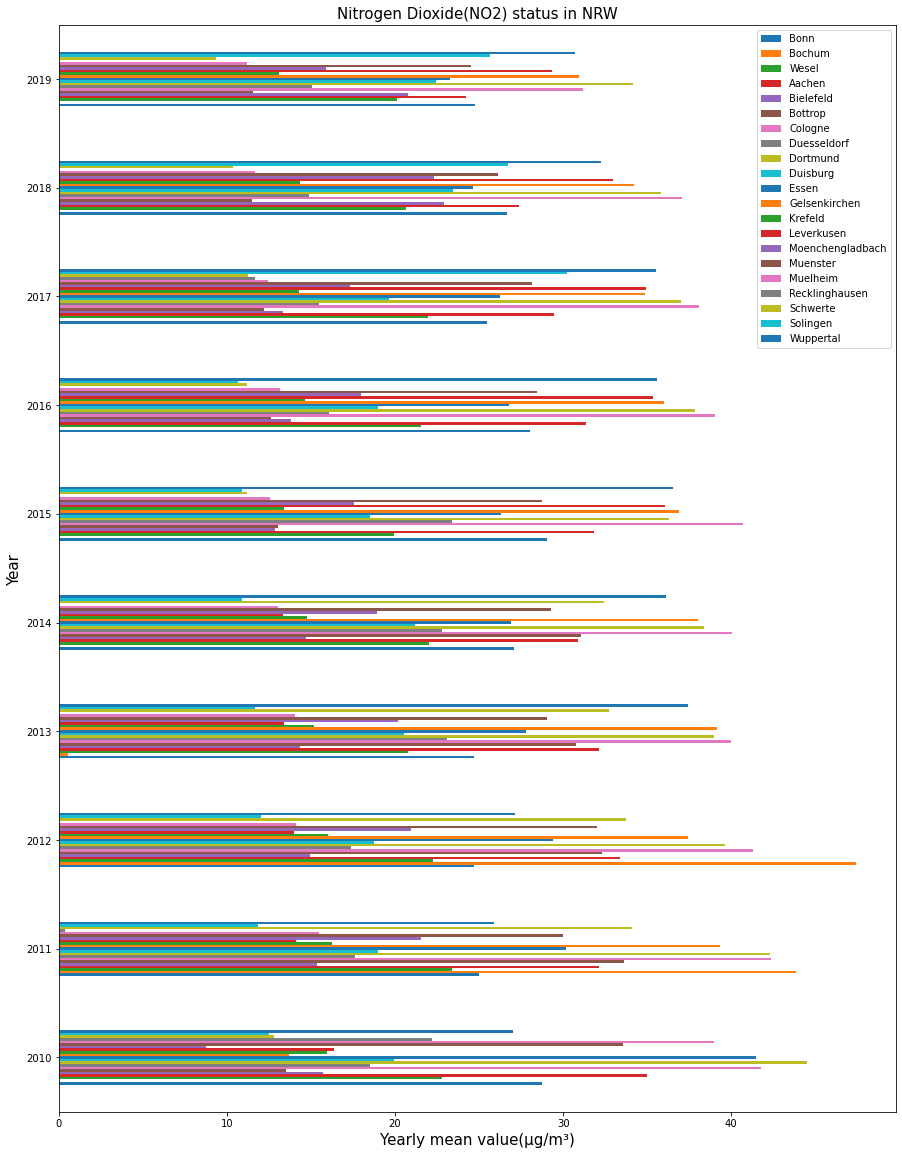

In [77]:
ax = df7.plot(kind = "barh",figsize=(15,20), fontsize=10)
ax.set_xlabel("Yearly mean value(µg/m³)",fontsize=15)
ax.set_ylabel("Year",fontsize=15)
ax.set_title("Nitrogen Dioxide(NO2) status in NRW",fontsize=15)
fig = ax.get_figure()   
fig.savefig('NO2.png')

In [ ]:
Y1 = df7.Year

# Defining custom 'xlim' and 'ylim' values.
#custom_ylim = (0, 500)

#fig, axes1 = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

#axes1[0].plot(x1, df.R_216_olpe_cum)
#axes1[0].set_title('Olpe_Station_ID-00216')
#axes1[0].set_ylabel('Cumulative Precipitation (mm)')
